In [ ]:
Libraries downloaded :-

In [14]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
Amazon dataset downloaded and cleaned:-

In [15]:
# Step 2: Load the Amazon reviews dataset
df_reviews = pd.read_csv('Amazon shopping.csv')


In [16]:
# Step 3: Initial data exploration
df_reviews.head()
df_reviews.info()
df_reviews.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99000 entries, 0 to 98999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewId       99000 non-null  object 
 1   content        99000 non-null  object 
 2   score          99000 non-null  int64  
 3   thumbsUpCount  99000 non-null  int64  
 4   at             99000 non-null  int64  
 5   replyContent   2 non-null      object 
 6   repliedAt      2 non-null      float64
 7   appName        99000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.0+ MB


(99000, 8)

In [17]:
# Step 4: Check for missing values
df_reviews.isnull().sum()


reviewId             0
content              0
score                0
thumbsUpCount        0
at                   0
replyContent     98998
repliedAt        98998
appName              0
dtype: int64

In [18]:
# Step 5: Remove records with missing review text or ratings
df_reviews = df_reviews.dropna(subset=['content', 'score'])


In [19]:
# Step 6: Retain only relevant columns for analysis
df_reviews = df_reviews[['content', 'score']]


In [20]:
# Step 7: Convert review text to string format
df_reviews['content'] = df_reviews['content'].astype(str)


In [21]:
# Step 8: Final check of cleaned dataset
df_reviews.isnull().sum()
df_reviews.head()


,content,score
0,I have been an Amazon customer for YEARS. I ne...,2
1,For the last 30 days or more I can only naviga...,2
2,Although I absolutely LOVE the company and the...,2
3,"Experience had gotten better but lately, they ...",2
4,Too many sponsored irrelevant items. About 40-...,2


In [ ]:
E-commerce data downloaded and cleaned:-

In [22]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np


In [23]:
# Step 2: Load the e-commerce transaction dataset
df_orders = pd.read_csv('retail_and_ecommerce_ecommerce_order_data.csv')


In [24]:
# Step 3: Initial inspection
df_orders.head()
df_orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   order_id                 1000000 non-null  object 
 1   customer_id              1000000 non-null  object 
 2   order_date               1000000 non-null  object 
 3   platform                 1000000 non-null  object 
 4   order_value_ngn          1000000 non-null  float64
 5   shipping_fee_ngn         1000000 non-null  float64
 6   payment_method           1000000 non-null  object 
 7   payment_processor        1000000 non-null  object 
 8   delivery_city            1000000 non-null  object 
 9   delivery_status          1000000 non-null  object 
 10  estimated_delivery_days  1000000 non-null  int64  
 11  order_status             1000000 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 91.6+ MB


In [25]:
# Step 4: Remove records with missing customer or order information
df_orders = df_orders.dropna(subset=['customer_id', 'order_id', 'order_date'])


In [26]:
# Step 5: Convert order_date to datetime format
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])


In [27]:
# Step 6: Retain only completed transactions
df_completed = df_orders[df_orders['order_status'] == 'Completed']


In [28]:
# Step 7: Final verification
df_completed.isnull().sum()
df_completed.head()


,order_id,customer_id,order_date,platform,order_value_ngn,shipping_fee_ngn,payment_method,payment_processor,delivery_city,delivery_status,estimated_delivery_days,order_status


In [10]:
SENTIMENT ANALYSIS :-

SyntaxError: invalid syntax (2130141652.py, line 1)

In [29]:
# Import VADER sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Compute compound sentiment score for each review
df_reviews['sentiment_score'] = df_reviews['content'].apply(
    lambda x: sid.polarity_scores(str(x))['compound']
)

# Classify sentiment based on compound score thresholds
df_reviews['sentiment_label'] = df_reviews['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')
)

# View sample results
df_reviews[['content', 'sentiment_score', 'sentiment_label']].head()


,content,sentiment_score,sentiment_label
0,I have been an Amazon customer for YEARS. I ne...,0.7444,Positive
1,For the last 30 days or more I can only naviga...,0.0000,Neutral
2,Although I absolutely LOVE the company and the...,0.8098,Positive
3,"Experience had gotten better but lately, they ...",0.2382,Positive
4,Too many sponsored irrelevant items. About 40-...,-0.5455,Negative


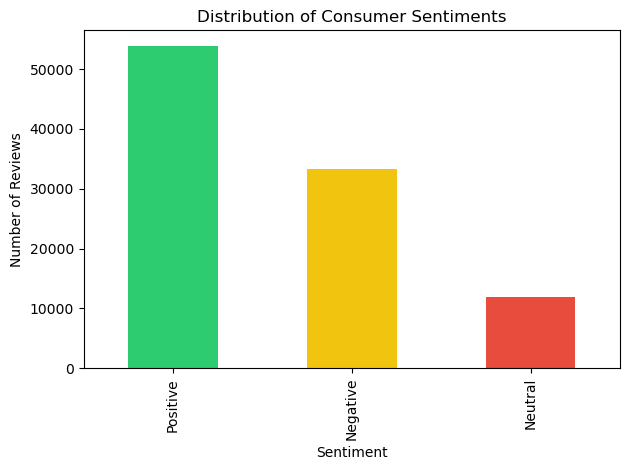

In [32]:
sentiment_counts = df_reviews['sentiment_label'].value_counts()
sentiment_counts.plot(kind='bar', color=['#2ecc71', '#f1c40f', '#e74c3c'] # Green, Yellow, Red
    )
plt.title("Distribution of Consumer Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.savefig("fig_1_sentiment_distribution.png", dpi=300)
plt.show()

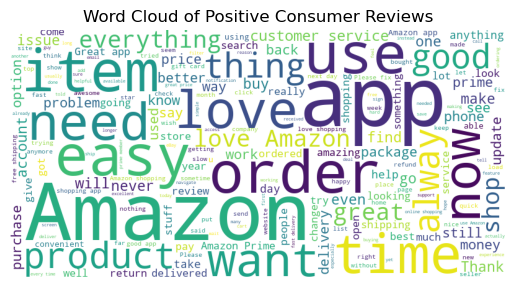

In [33]:
positive_text = " ".join(
    df_reviews[df_reviews['sentiment_label'] == 'Positive']['content']
)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of Positive Consumer Reviews")
plt.savefig("fig_2_positive_wordcloud.png", dpi=300)
plt.show()


In [ ]:
RFM BASED CUSTOMER SEGMENTATION:-

In [30]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])

df_completed = df_orders[df_orders['order_status'] == 'completed']

reference_date = df_completed['order_date'].max() + pd.Timedelta(days=1)

rfm = df_completed.groupby('customer_id').agg({
    'order_date': lambda x: (reference_date - x.max()).days,
    'order_id': 'count',
    'order_value_ngn': 'sum'
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,CUST100001,72,4,1058640.66
1,CUST100003,89,2,372787.89
2,CUST100004,41,2,145310.14
3,CUST100007,131,1,398732.62
4,CUST100009,172,2,711368.27


In [34]:
# Rank-based RFM scoring (robust for skewed data)

rfm['R_Score'] = pd.qcut(
    rfm['Recency'].rank(method='first'),
    4,
    labels=[4, 3, 2, 1]
)

rfm['F_Score'] = pd.qcut(
    rfm['Frequency'].rank(method='first'),
    4,
    labels=[1, 2, 3, 4]
)

rfm['M_Score'] = pd.qcut(
    rfm['Monetary'].rank(method='first'),
    4,
    labels=[1, 2, 3, 4]
)

# Combine RFM scores
rfm['RFM_Segment'] = (
    rfm['R_Score'].astype(str) +
    rfm['F_Score'].astype(str) +
    rfm['M_Score'].astype(str)
)


In [35]:
rfm[['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score']].head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,72,4,1058640.66,3,4,4
1,89,2,372787.89,3,3,3
2,41,2,145310.14,4,3,1
3,131,1,398732.62,2,1,3
4,172,2,711368.27,2,3,4


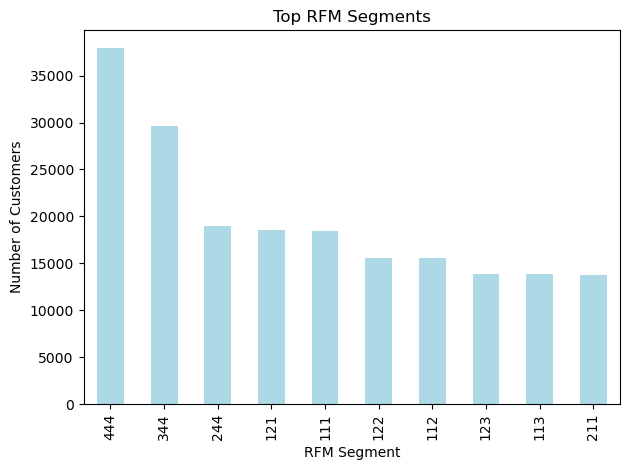

In [36]:
rfm['RFM_Segment'].value_counts().head(10).plot(
    kind='bar',
    color='#ADD8E6' # light blue
)
plt.title("Top RFM Segments")
plt.xlabel("RFM Segment")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.savefig("fig_3_rfm_segments.png", dpi=300)
plt.show()

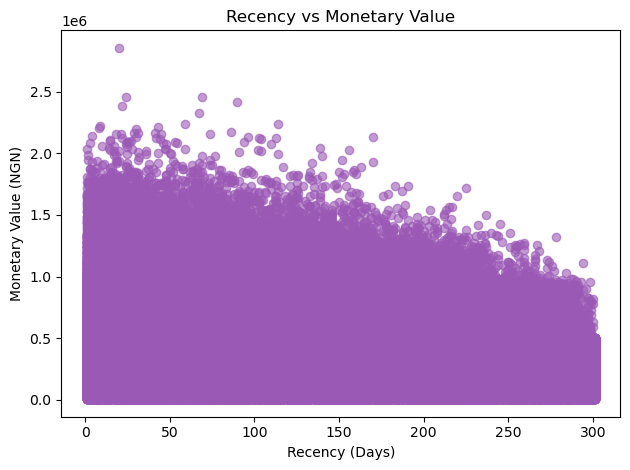

In [37]:
plt.scatter(
    rfm['Recency'], 
    rfm['Monetary'],
    alpha=0.6,
    color='#9b59b6' # Purple
)
plt.xlabel("Recency (Days)")
plt.ylabel("Monetary Value (NGN)")
plt.title("Recency vs Monetary Value")
plt.tight_layout()
plt.savefig("fig_4_recency_monetary.png", dpi=300)
plt.show()

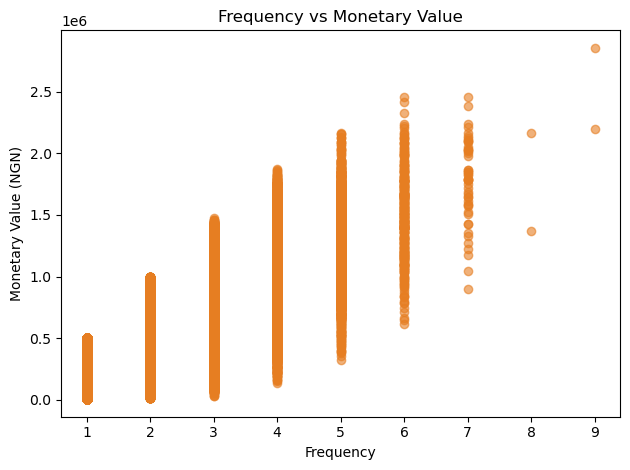

In [38]:
plt.scatter(
    rfm['Frequency'], 
    rfm['Monetary'],
    alpha=0.6,
    color='#e67e22' # Orange
)
plt.xlabel("Frequency")
plt.ylabel("Monetary Value (NGN)")
plt.title("Frequency vs Monetary Value")
plt.tight_layout()
plt.savefig("fig_5_frequency_monetary.png", dpi=300)
plt.show()


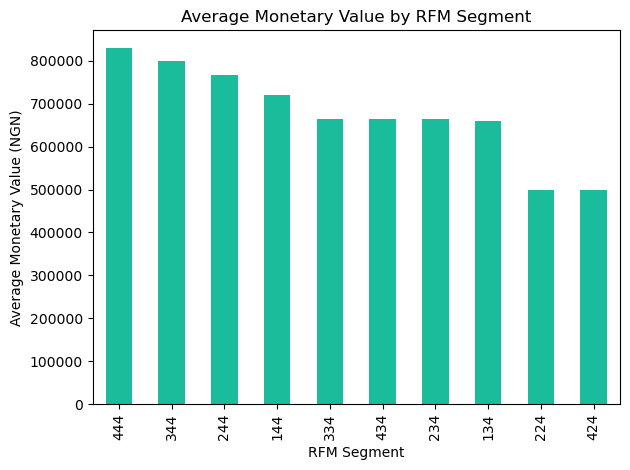

In [39]:
rfm.groupby('RFM_Segment')['Monetary'].mean().sort_values(ascending=False).head(10).plot(
    kind='bar',
    color='#1abc9c' #Teal
)
plt.title("Average Monetary Value by RFM Segment")
plt.xlabel("RFM Segment")
plt.ylabel("Average Monetary Value (NGN)")
plt.tight_layout()
plt.savefig("fig_6_avg_monetary_segment.png", dpi=300)
plt.show()


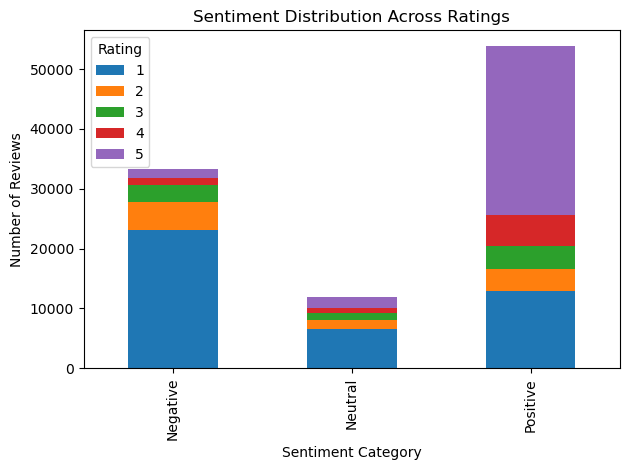

In [40]:
# Sentiment vs Rating Distribution
sentiment_rating = df_reviews.groupby(['sentiment_label', 'score']).size().unstack(fill_value=0)

sentiment_rating.plot(kind='bar', stacked=True)
plt.title("Sentiment Distribution Across Ratings")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Reviews")
plt.legend(title="Rating")
plt.tight_layout()
plt.savefig("fig_7_sentiment_vs_rating.png", dpi=300)
plt.show()

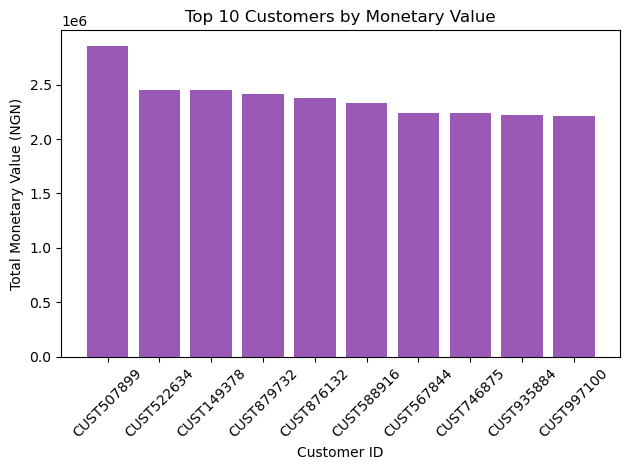

In [41]:
# Top 10 Customers by Monetary Value
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)

plt.bar(
    top_customers['CustomerID'].astype(str), 
    top_customers['Monetary'],
    color='#9b59b6' # Purple
)
plt.title("Top 10 Customers by Monetary Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Monetary Value (NGN)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("fig_8_top_customers_monetary.png", dpi=300)
plt.show()
